# Pymaceuticals Inc.
---

### Analysis

- Average math and reading scores stay consistent across grade level when grouped by school.  There is no major improvement in scores from any school.Math passing rates are always consistently lower across every metric, but the difference between math and reading passing rates is greater among lower performing schools, large schools, and higher spending per student which all seem to correlate.  Schools with higher budgets, did not yield better test results. By contrast, schools with higher spending per student (645-680) underperformed schools with a smaller budget (<585 per student). Smaller and medium sized schools dramatically out-performed large sized schools on passing math performances. Overall, Charter schools outperformed the public district schools across all metrics. However, more analysis will be required to understand if the effect is due to school practices or the fact that charter schools tend to have smaller student populations per school. In general, there is one exception, per student spending is higher in bottom performing schools than top performing. 

 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#combined_Metadata = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
combined_Metadata = study_results.merge(mouse_metadata, on='Mouse ID')
combined_Metadata.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Checking the number of mice.
combined_Metadata['Mouse ID'].nunique() 

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
# (This code will identify the duplicate entries in the DataFrame that have the same 'Mouse ID' and 'Timepoint' values.)
duplicate_mouse = combined_Metadata.loc[combined_Metadata.duplicated(subset= ['Mouse ID','Timepoint'], keep='first')]
duplicate_mouse['Mouse ID'].unique()


array(['g989'], dtype=object)

In [30]:
# assign the duplicate mouse 
duplicate_mouse_ID = duplicate_mouse['Mouse ID'].unique()

In [31]:
# Optional: Get all the data for the duplicate mouse ID.
# Filter the rows where Mouse ID column equals duplicate_mouse_ID
# using loc, we want to check where the Mouse ID column in the combined df equals duplicate_mouse_ID

duplicate_rows = combined_Metadata.loc[combined_Metadata['Mouse ID'].isin(duplicate_mouse_ID)]

duplicate_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the above duplicate mouse by its ID.
cleaned_df = combined_Metadata.loc[combined_Metadata['Mouse ID'].isin(duplicate_mouse_ID)==False]

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [33]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_df['Mouse ID'].nunique()

print(num_mice)

248


## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean= cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var= cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std= cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


mean
median
var
std
sem


# Rename the columns in the summary statistics DataFrame
summary_stats = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': var,
                              'Standard Deviation': std, 'SEM': sem})
# Display the summary statistics DataFrame
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Group the data by 'Drug Regimen' and calculate the required statistics
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns in the summary statistics DataFrame
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance',
                                              'std': 'Standard Deviation', 'sem': 'SEM'})

# Display the summary statistics DataFrame
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

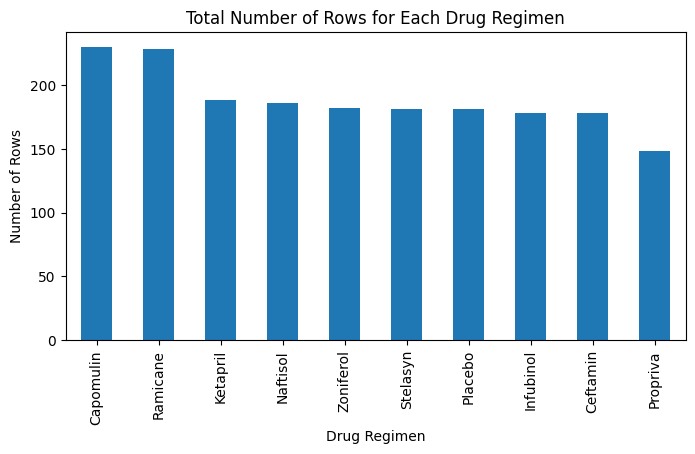

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the occurrences of each drug regimen
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(8, 4))

# Set the plot title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

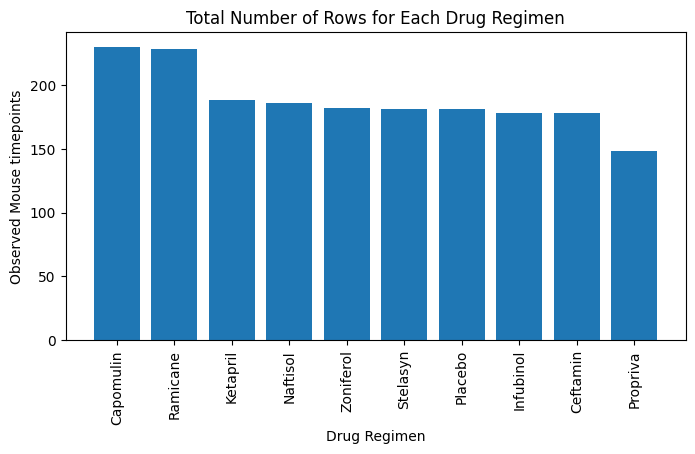

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the occurrences of each drug regimen
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(8, 4))
plt.bar(regimen_counts.index, regimen_counts.values)

# Set the plot title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

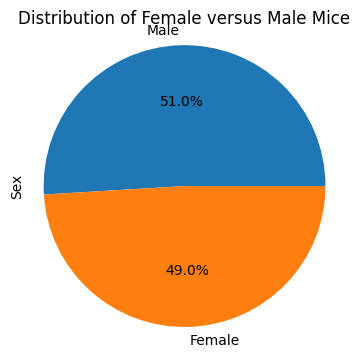

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of female and male mice
gender_counts = cleaned_df['Sex'].value_counts()

# Create a pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))

# Set the plot title
plt.title('Distribution of Female versus Male Mice') 
plt.ylabel ('Sex')
# Set the aspect ratio to 'equal' for a circular pie
plt.axis('equal')

# Display the plot
plt.show()


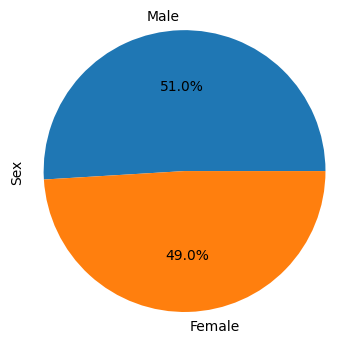

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of female and male mice
gender_counts = cleaned_df['Sex'].value_counts()

# Create a pie plot using pyplot

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set the labels 

plt.ylabel ('Sex')

# Set the aspect ratio to 'equal' for a circular pie
plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [41]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR for the current treatment regimen
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
   # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine if there are any potential outliers for the current treatment regimen
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f'Treatment Regimen: {treatment}')
    print(f'Potential Outliers: {outliers}\n')
    


    
   


Treatment Regimen: Capomulin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Regimen: Ramicane
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Regimen: Infubinol
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment Regimen: Ceftamin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



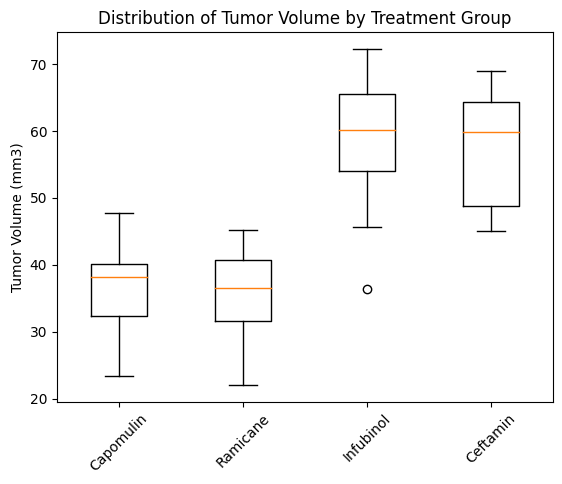

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot using the tumor volume data for each treatment group
ax.boxplot(tumor_volume_data, labels=treatments)

# Set the plot title and y-axis label
ax.set_title('Distribution of Tumor Volume by Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')

# Set the x-axis tick labels to rotate for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Line and Scatter Plots

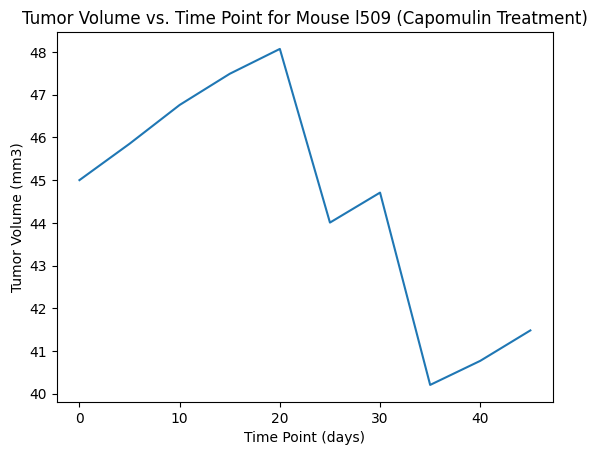

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a mouse ID from the Capomulin treatment group
mouse_id = 'l509'

# Filter the data for the chosen mouse ID and Capomulin treatment
mouse_data = cleaned_df.loc[(cleaned_df['Mouse ID'] == mouse_id) & (cleaned_df['Drug Regimen'] == 'Capomulin')]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], )

# Set the plot title and axis labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

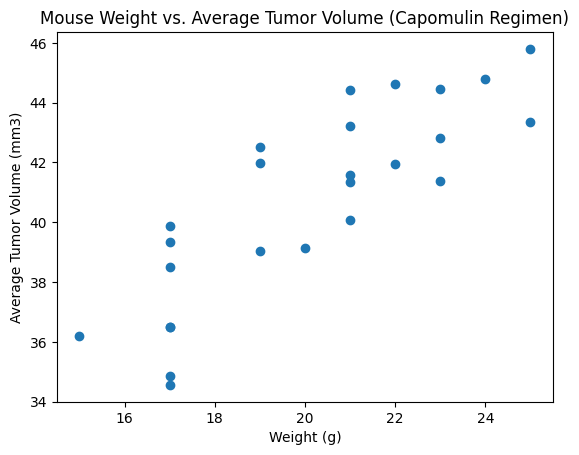

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin treatment regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to get the corresponding weight
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Create the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set the plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


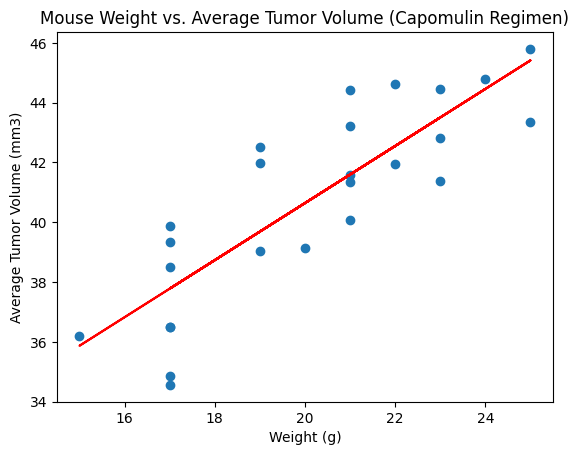

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter the data for the Capomulin treatment regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to get the corresponding weight
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Extract weight and tumor volume data
weight = merged_data['Weight (g)']
tumor_volume = merged_data['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation = st.pearsonr(weight, tumor_volume)[0]
correlation = round(correlation, 2)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weight, tumor_volume)

# Create the regression line data
regression_line = slope * weight + intercept

# Create the scatter plot and regression line
plt.scatter(weight, tumor_volume)
plt.plot(weight, regression_line, color='red')

# Set the plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()
